In [17]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [5]:
key='cbf822580ae37025d4aa97c50146d91fa3dfae8a'

In [6]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [7]:
df.to_csv('AAPLdataset.csv')

In [8]:
df.head()

close     high  ...  divCash  splitFactor
symbol date                                        ...                      
AAPL   2015-12-30 00:00:00+00:00  107.32  108.700  ...      0.0          1.0
       2015-12-31 00:00:00+00:00  105.26  107.030  ...      0.0          1.0
       2016-01-04 00:00:00+00:00  105.35  105.368  ...      0.0          1.0
       2016-01-05 00:00:00+00:00  102.71  105.850  ...      0.0          1.0
       2016-01-06 00:00:00+00:00  100.70  102.370  ...      0.0          1.0

[5 rows x 12 columns]

In [9]:
df.shape

(1257, 12)

In [10]:
df.tail()

close     high  ...  divCash  splitFactor
symbol date                                         ...                      
AAPL   2020-12-18 00:00:00+00:00  126.655  129.100  ...      0.0          1.0
       2020-12-21 00:00:00+00:00  128.230  128.310  ...      0.0          1.0
       2020-12-22 00:00:00+00:00  131.880  134.405  ...      0.0          1.0
       2020-12-23 00:00:00+00:00  130.960  132.430  ...      0.0          1.0
       2020-12-24 00:00:00+00:00  131.970  133.460  ...      0.0          1.0

[5 rows x 12 columns]

In [13]:
df1=df.reset_index()['close']
df1

0       107.320
1       105.260
2       105.350
3       102.710
4       100.700
         ...   
1252    126.655
1253    128.230
1254    131.880
1255    130.960
1256    131.970
Name: close, Length: 1257, dtype: float64

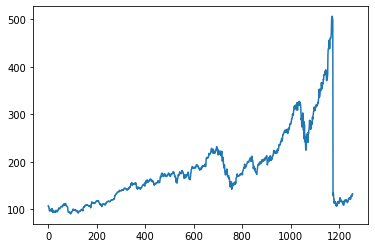

In [14]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [15]:
#Always scale values. Because LSTM is very sensitive to large values

In [20]:
scaler= MinMaxScaler(feature_range=(0, 1))
df1= scaler.fit_transform(np.array(df1).reshape(-1,1))

In [21]:
df1

array([[0.04084185],
       [0.03588695],
       [0.03610343],
       ...,
       [0.09991581],
       [0.09770295],
       [0.10013229]])

In [22]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size

In [23]:
training_size,test_size


(817, 440)

In [24]:
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


In [25]:
train_data

array([[0.04084185],
       [0.03588695],
       [0.03610343],
       [0.02975346],
       [0.02491882],
       [0.01469633],
       [0.01592303],
       [0.01969934],
       [0.02313891],
       [0.01695731],
       [0.02208058],
       [0.01633193],
       [0.01520144],
       [0.01551413],
       [0.01433554],
       [0.02665063],
       [0.02188815],
       [0.02321106],
       [0.0074083 ],
       [0.00901984],
       [0.01683704],
       [0.01464823],
       [0.00995791],
       [0.0144558 ],
       [0.01505713],
       [0.00885147],
       [0.01123271],
       [0.01118461],
       [0.0094528 ],
       [0.00808178],
       [0.00877931],
       [0.01515334],
       [0.01871317],
       [0.01423933],
       [0.01371016],
       [0.01573061],
       [0.01046302],
       [0.01385448],
       [0.01544197],
       [0.01580277],
       [0.0152736 ],
       [0.02450992],
       [0.02503909],
       [0.02684305],
       [0.03047505],
       [0.02773301],
       [0.02571257],
       [0.025

In [28]:
# convert an array of values into a dataset matrix
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [29]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [30]:
print(X_train.shape), print(y_train.shape)


(716, 100)
(716,)


(None, None)

In [31]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [32]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [33]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
12/12 [==============================] - 11s 117ms/step - loss: 0.0159 - val_loss: 0.0570
Epoch 2/100
12/12 [==============================] - 0s 21ms/step - loss: 0.0028 - val_loss: 0.0223
Epoch 3/100
12/12 [==============================] - 0s 19ms/step - loss: 8.6258e-04 - val_loss: 0.0208
Epoch 4/100
12/12 [==============================] - 0s 19ms/step - loss: 4.0381e-04 - val_loss: 0.0203
Epoch 5/100
12/12 [==============================] - 0s 20ms/step - loss: 3.3651e-04 - val_loss: 0.0202
Epoch 6/100
12/12 [==============================] - 0s 19ms/step - loss: 3.3422e-04 - val_loss: 0.0201
Epoch 7/100
12/12 [==============================] - 0s 19ms/step - loss: 3.7042e-04 - val_loss: 0.0195
Epoch 8/100
12/12 [==============================] - 0s 19ms/step - loss: 3.2514e-04 - val_loss: 0.0187
Epoch 9/100
12/12 [==============================] - 0s 19ms/step - loss: 3.3207e-04 - val_loss: 0.0185
Epoch 10/100
12/12 [==============================] - 0s 19ms/step - l

In [37]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [38]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [39]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

158.92468019967112

In [40]:

### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

251.36096034486096

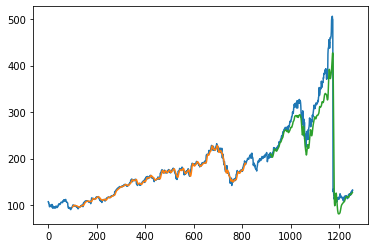

In [41]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [42]:
len(test_data)

440

In [44]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [45]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [46]:
temp_input


[0.841635598316296,
 0.8785808779314492,
 0.8517378232110644,
 0.8672760072158752,
 0.8350210463018641,
 0.8699939867708961,
 0.8892363199037885,
 0.8882501503307276,
 0.8853638003607938,
 0.89455201443175,
 0.8959470835838845,
 0.9206494287432352,
 0.9792904389657247,
 0.9936019242333134,
 0.9836680697534577,
 1.0,
 0.9854479855682503,
 0.983499699338545,
 0.09308478653036678,
 0.10544798556825014,
 0.09876127480457003,
 0.07345760673481655,
 0.07365003006614551,
 0.05407095610342749,
 0.06489476849067943,
 0.055682501503307225,
 0.052098616957306054,
 0.0601683704149128,
 0.06061334936861096,
 0.05241130487071555,
 0.04810583283223091,
 0.03968731208659049,
 0.04748045700541187,
 0.05164161154539987,
 0.04036079374624174,
 0.04300661455201443,
 0.05277209861695731,
 0.05921828021647624,
 0.05712567648827421,
 0.06126277811184605,
 0.06361996392062536,
 0.05455201443174984,
 0.062922429344558,
 0.05488875526157544,
 0.059506915213469624,
 0.059242333132892344,
 0.06405291641611544,
 0

In [47]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.09368519]
101
1 day input [0.87858088 0.85173782 0.86727601 0.83502105 0.86999399 0.88923632
 0.88825015 0.8853638  0.89455201 0.89594708 0.92064943 0.97929044
 0.99360192 0.98366807 1.         0.98544799 0.9834997  0.09308479
 0.10544799 0.09876127 0.07345761 0.07365003 0.05407096 0.06489477
 0.0556825  0.05209862 0.06016837 0.06061335 0.0524113  0.04810583
 0.03968731 0.04748046 0.05164161 0.04036079 0.04300661 0.0527721
 0.05921828 0.05712568 0.06126278 0.06361996 0.05455201 0.06292243
 0.05488876 0.05950692 0.05924233 0.06405292 0.08192423 0.07398677
 0.07420325 0.07304871 0.06898376 0.06167168 0.06535177 0.06381239
 0.06111846 0.0594107  0.05943476 0.06316296 0.05017438 0.06008419
 0.044546   0.04432952 0.04834636 0.05919423 0.06900782 0.06819002
 0.06248948 0.06164762 0.07011425 0.06944077 0.06956103 0.07206254
 0.06987372 0.06660253 0.06806975 0.06494287 0.05654841 0.05972339
 0.06179194 0.06313891 0.06905592 0.07788334 0.07874925 0.07841251
 0.07675286 0.08036079 0.08187613 

In [48]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [49]:
len(df1)

1257

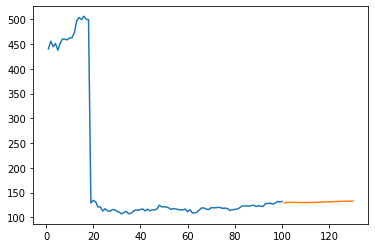

In [50]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

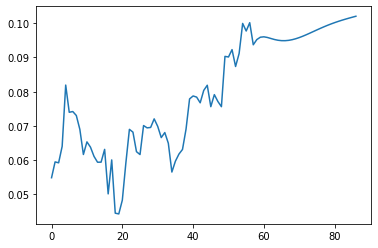

In [51]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [52]:
df3=scaler.inverse_transform(df3).tolist()


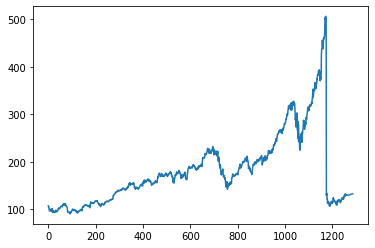

In [53]:
plt.plot(df3)
